･ (Period to calculate initial phase)		=  1e-10  ~  4e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.
Using default parameters


100%|██████████| 13/13 [01:06<00:00,  5.09s/it]


,low(value),low(%),high(value),high(%)
BIAS,0.058594,-88.281250,1.000000,100.00000
SQUID2,0.002375,-99.609375,0.964250,58.59375
SQUID8,0.648375,-10.937500,0.807625,10.93750
SQUID4,0.516656,-22.656250,0.788031,17.96875
L1,5.121094,-62.890625,25.767187,86.71875
R1,35.625000,-55.468750,160.000000,100.00000
SQUID3,0.494461,-14.453125,0.659281,14.06250
L2,1.617188,-82.031250,18.000000,100.00000
R2,8.367188,-80.078125,84.000000,100.00000
SQUID5,0.001906,-99.609375,0.640500,31.25000


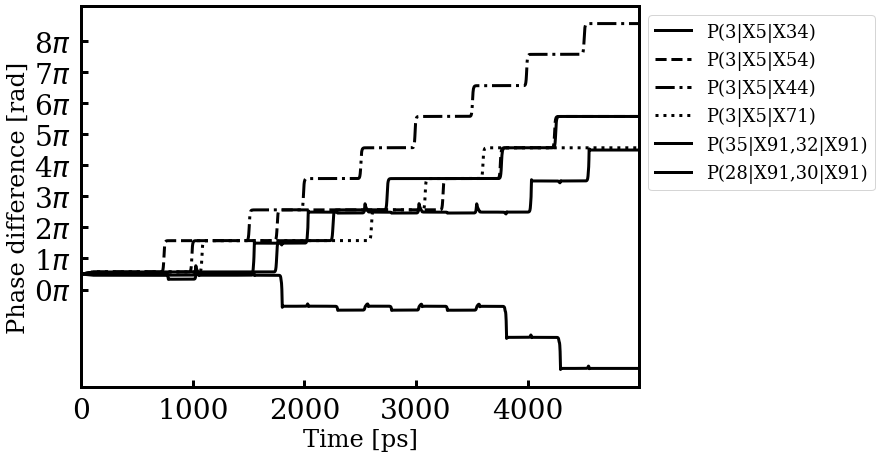

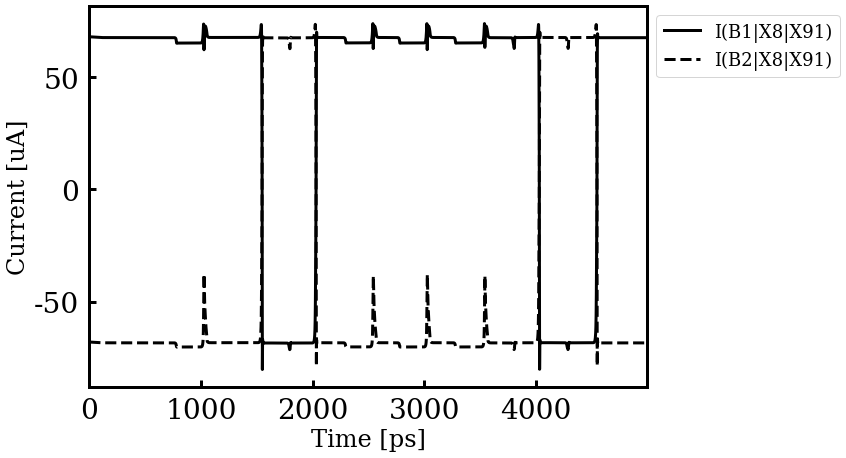

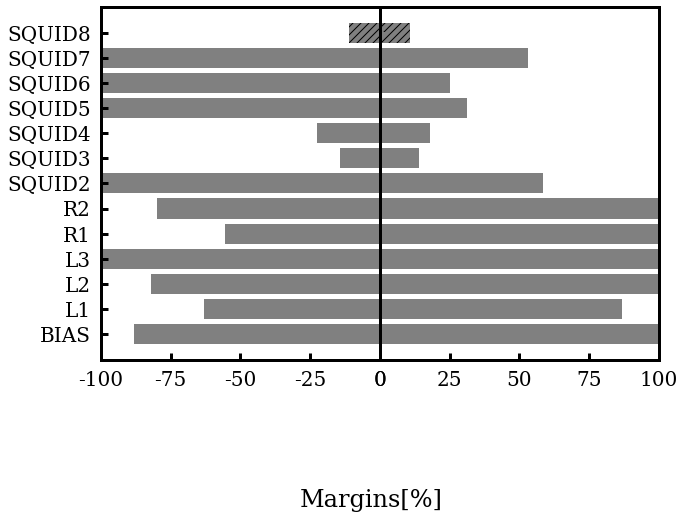

In [4]:
input = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.04pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

** + -------------------- +
** |     HFQJTL           |
** + -------------------- +
.subckt jtl_squid   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   20ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt jtl_base        1       5       100
L1                      1       2       1pH
L2                      2       3       4.2pH
L3                      3       4       8.4pH
L4                      4       5       3.2pH
X1      jtl_squid       3       0
X2      jtl_squid       4       0
R1                      2       100     34ohm
.ends

.subckt jtl_base8       1       9       100
X1      jtl_base        1       2       100
X2      jtl_base        2       3       100
X3      jtl_base        3       4       100
X4      jtl_base        4       5       100
X5      jtl_base        5       6       100
X6      jtl_base        6       7       100
X7      jtl_base        7       8       100
X8      jtl_base        8       9       100
.ends
** + ---------------------------------- +


** + -------------------- +
** |     XOR_PAIR         |
** + -------------------- +
.subckt xor_squid1   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   20ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt xor_squid2   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID2(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID2(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt xor_squid3   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID3(0.578)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID3(0.578)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt xor_pair        1       7     100
L1                      1       2       1pH
R1                      2       100     34ohm
L2                      2       3       4.2pH
X1      xor_squid1      3       0
L3                      3       4       8.4pH
X2      xor_squid2      4       0
X3      xor_squid3      4       5
L4                      5       6       #L1(13.8)pH
R2                      6       100     #R1(80)ohm
L5                      6       7       #L2(9)pH
.ends
** + ---------------------------------- +


** + ------------------------------------------------------------------------------------------------------------  +
** |     XOR                                                                                                       |
** + ------------------------------------------------------------------------------------------------------------  +
.subckt xor_squid4   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID4(0.668)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID4(0.668)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=100
R3                  4       2   0.39ohm
.ends

.subckt xor_squid5   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID5(0.488)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID5(0.488)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=100
R3                  4       2   0.39ohm
.ends

.subckt xor_squid6   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID6(0.548)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID6(0.548)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=100
R3                  4       2   0.39ohm
.ends

.subckt xor_squid7   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID7(0.608)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID7(0.608)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=100
R3                  4       2   0.39ohm
.ends

.subckt xor_squid8   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=#SQUID8(0.728)
R1                  1       5   20ohm 
B2                  2       5   jjmod area=#SQUID8(0.728)
R2                  2       5   20ohm
B3                  4       2   pjjmod area=100
R3                  4       2   0.39ohm
.ends

.subckt xor_squid9   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=2
R1                  1       5   20ohm 
B2                  2       5   jjmod area=2
R2                  2       5   20ohm
B3                  4       2   pjjmod area=100
R3                  4       2   0.39ohm
.ends


***            a     b     clk   c    bias
.subckt XOR    44    39    36    9    100

X51     xor_pair    44  29  100
X52     xor_pair    39  29  100

** --------- start from input ------------
L1                          29          30   1pH fcheck
X4    xor_squid4            28          30
L2                          28          27   1pH fcheck
L3                          27          26   1pH fcheck
X5    xor_squid5            26          0
L4                          26          8   8.4pH fcheck
X6    xor_squid6            8           0
L5                          8           9   3.2pH fcheck


** --------- start from clk ------------
L11                         36        18   1pH fcheck
R4                          18        100  #R2(42)ohm
L12                         18        34   4.2pH fcheck
X7   xor_squid7             34        0
L13                         34        35   1pH fcheck
X8   xor_squid8             35        32
L14                         32        33   1pH fcheck
X9   xor_squid9             31        33
L15                         31        27   #L3(2)pH fcheck
.ends
** + ------------------------------------------------------------------------------------------------------ +


*** top cell: 

Vin1                        31      0       PWL(0ps 0mV   1510ps 0mV 1511ps 0.517mV 1512ps 0.517mV 1513ps 0mV   2000ps 0mV 2001ps 0.517mV 2002ps 0.517mV 2003ps 0mV   2500ps 0mV 2501ps 0.517mV 2502ps 0.517mV 2503ps 0mV   3510ps 0mV 3511ps 0.517mV 3512ps 0.517mV 3513ps 0mV   4010ps 0mV 4011ps 0.517mV 4012ps 0.517mV 4013ps 0mV)
R31                         31      32                       1ohm
X31    jtl_base8            32      33      100
X32    jtl_base8            33      34      100
X33    jtl_base8            34      35      100
X34    jtl_base8            35      36      100

Vin2                        51      0       PWL(0ps 0mV   500ps 0mV 501ps 0.517mV 502ps 0.517mV 503ps 0mV   1500ps 0mV 1501ps 0.517mV 1502ps 0.517mV 1503ps 0mV   3000ps 0mV 3001ps 0.517mV 3002ps 0.517mV 3003ps 0mV   3500ps 0mV 3501ps 0.517mV 3502ps 0.517mV 3503ps 0mV   4000ps 0mV 4001ps 0.517mV 4002ps 0.517mV 4003ps 0mV)
R51                         51      52                       1ohm
X51    jtl_base8            52      53      100
X52    jtl_base8            53      54      100
X53    jtl_base8            54      55      100
X54    jtl_base8            55      56      100

Vinclk                      41      0       PWL(0ps 0mV   750ps 0mV 751ps 0.517mV 752ps 0.517mV 753ps 0mV   1250ps 0mV 1251ps 0.517mV 1252ps 0.517mV 1253ps 0mV   1750ps 0mV 1751ps 0.517mV 1752ps 0.517mV 1753ps 0mV   2250ps 0mV 2251ps 0.517mV 2252ps 0.517mV 2253ps 0mV   2750ps 0mV 2751ps 0.517mV 2752ps 0.517mV 2753ps 0mV   3250ps 0mV 3251ps 0.517mV 3252ps 0.517mV 3253ps 0mV   3750ps 0mV 3751ps 0.517mV 3752ps 0.517mV 3753ps 0mV   4250ps 0mV 4251ps 0.517mV 4252ps 0.517mV 4253ps 0mV)
R41                         41      42                       1ohm
X41    jtl_base8            42      43      100
X42    jtl_base8            43      44      100
X43    jtl_base8            44      45      100
X44    jtl_base8            45      46      100


X91     XOR                 36      56      46      72      200


X71    jtl_base8            72      73      100
X72    jtl_base8            73      74      100
X73    jtl_base8            74      75      100
X74    jtl_base8            75      76      100
R72                         76      77                      8.32ohm
L71                         77      0                       2pH fcheck


Vb1                         100     0                       pwl(0ps 0mV 100ps 0.5mV)
Vb2                         200     0                       pwl(0ps 0mV 100ps #BIAS(0.5)mV)


*** jsim input file ***
.tran 1ps 5000ps 0ps 1ps

.print phase  3|X5|X34
.print phase  3|X5|X54
.print phase  3|X5|X44

.print phase  3|X5|X71

.print nodep  35|X91 32|X91
.print nodep  28|X91 30|X91

.print devi B1|X8|X91

.print devi B2|X8|X91

*.print devi B3|X8|X91

.end
"""


config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":400e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": ["P(3|X5|X34)","P(3|X5|X44)","P(3|X5|X54)","P(3|X5|X71)"],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}

from hfqco import data, util, pyjosim, netlist

from hfqco.pyjosim import simulation
from hfqco.graph import sim_plot
import importlib
importlib.reload(data)
importlib.reload(util)
importlib.reload(netlist)

# df = simulation(input)
# sim_plot(df)

# inp_df = util.create_inp_df("SQUID8", 0.608, 0.908, 0.01)
d = netlist.Netlist(input, config_data)
d.get_margins(blackstyle=True)
# d.custom_simulation(inp_df)
# inp_df.to_csv("xor8_pre.csv")

# d = data.Data(netlist_and, config_data)
# d.get_base_switch_timing()
# d.get_margins()